# Intent-Based Energy Reduction using Gaussian Mixture Models (GMM)

## Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [ ]:
df=pd.read_csv('drive/MyDrive/Intent-Based Energy Reduction/Data/Floor3_features_selected.csv')

In [ ]:
df.head()

,z1_AC2(kW),z1_AC3(kW),z1_Plug(kW),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_Light(kW),z2_Plug(kW),z2_S1(RH%),z2_S1(lux),...,z3_Plug(kW),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(RH%)
0,0.0,0.0,0.03,60.67,0.0,0.0,0.0,0.03,63.37,0.0,...,0.26,0.0,0.0,0.02,65.66,0.0,0.0,0.0,0.02,71.16
1,0.0,0.0,0.03,60.67,0.0,0.0,0.0,0.03,63.37,0.0,...,0.37,0.0,0.0,0.02,65.65,0.0,0.0,0.0,0.02,71.16
2,0.0,0.0,0.03,60.67,0.0,0.0,0.0,0.03,63.37,0.0,...,0.32,0.0,0.0,0.02,65.63,0.0,0.0,0.0,0.02,71.18
3,0.0,0.0,0.03,60.66,0.0,0.0,0.0,0.03,63.36,0.0,...,0.26,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.02,71.19
4,0.0,0.0,0.03,60.66,0.0,0.0,0.0,0.03,63.36,0.0,...,0.37,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.02,71.21


## Importing Machine Learning Libraries

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN, KMeans
from sklearn.svm import OneClassSVM
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import ParameterGrid
from sklearn.mixture import GaussianMixture
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Exploring Dataset Features

In [ ]:
features=list(df.columns)

In [ ]:
features

['z1_AC2(kW)',
 'z1_AC3(kW)',
 'z1_Plug(kW)',
 'z1_S1(RH%)',
 'z1_S1(lux)',
 'z2_AC1(kW)',
 'z2_Light(kW)',
 'z2_Plug(kW)',
 'z2_S1(RH%)',
 'z2_S1(lux)',
 'z3_Light(kW)',
 'z3_Plug(kW)',
 'z4_AC1(kW)',
 'z4_Light(kW)',
 'z4_Plug(kW)',
 'z4_S1(RH%)',
 'z4_S1(lux)',
 'z5_AC1(kW)',
 'z5_Light(kW)',
 'z5_Plug(kW)',
 'z5_S1(RH%)']

## Data Standardization

In [ ]:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## Applying PCA for Dimensionality Reduction

In [ ]:
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df_scaled)

## Gaussian Mixture Model (GMM) for Clustering

In [ ]:
model_gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
df['gmm_score'] = model_gmm.fit_predict(df_scaled)




## Calculating Anomaly Scores

In [ ]:
# Calculate the Abnormal score (using log likelihood)
df['Abnormal_gmm'] = model_gmm.score_samples(df[features])
threshold = np.percentile(df['Abnormal_gmm'], 1)  # Set the 1% most unlikely points as Abnormals
df['Abnormal_gmm'] = df['Abnormal_gmm'].apply(lambda x: 1 if x < threshold else 0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(


## Visualizing PCA Results with Anomalies

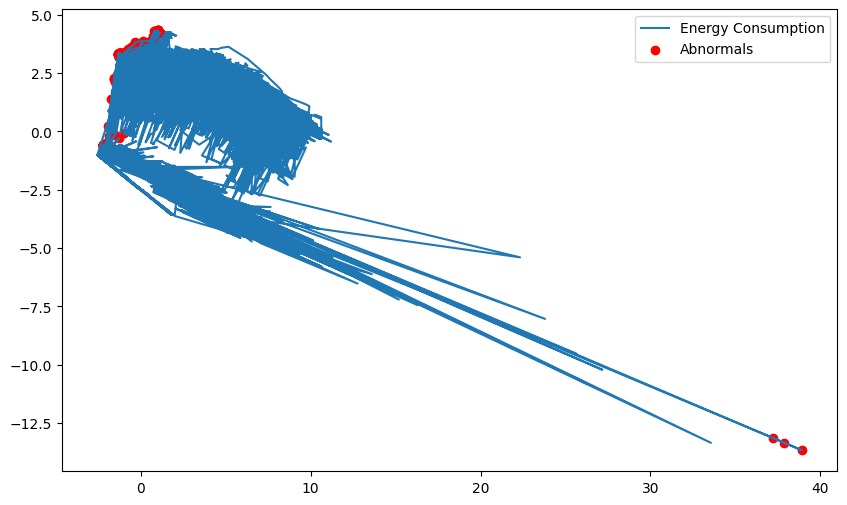

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_pca[:,0], df_pca[:,1], label='Energy Consumption')
plt.scatter(df_pca[:,0][df['Abnormal_gmm'] == 1], df_pca[:,1][df['Abnormal_gmm'] == 1], color='red', label='Abnormals')
plt.legend()
plt.show()

## Visualizing Anomaly Score Distribution

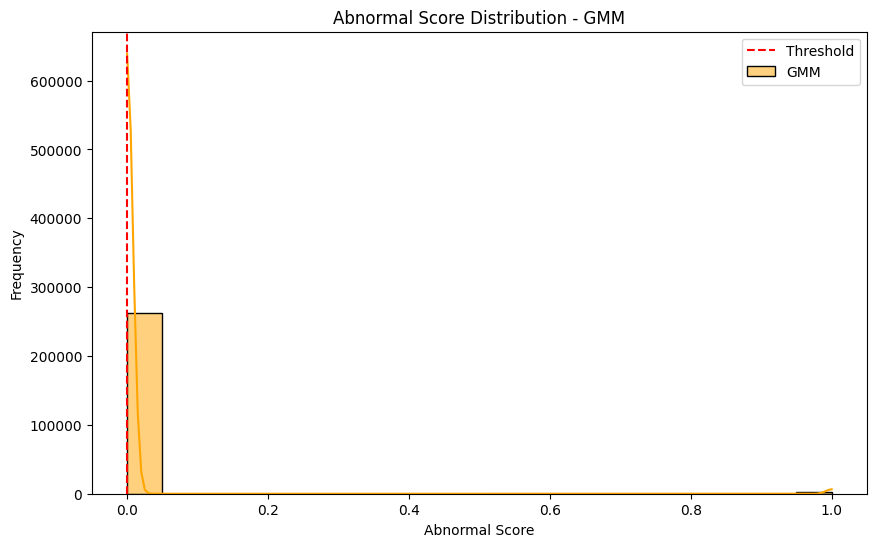

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Abnormal_gmm'], kde=True, color='orange', label='GMM')
plt.axvline(x=np.percentile(df['Abnormal_gmm'], 1), color='red', linestyle='--', label='Threshold')
plt.title("Abnormal Score Distribution - GMM")
plt.xlabel("Abnormal Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
df

,z1_AC2(kW),z1_AC3(kW),z1_Plug(kW),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_Light(kW),z2_Plug(kW),z2_S1(RH%),z2_S1(lux),...,z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(RH%),Abnormal_gmm
0,0.0,0.0,0.03,60.67,0.0,0.0,0.0,0.03,63.37,0.0,...,0.0,0.0,0.02,65.66,0.0,0.0,0.0,0.02,71.16,0
1,0.0,0.0,0.03,60.67,0.0,0.0,0.0,0.03,63.37,0.0,...,0.0,0.0,0.02,65.65,0.0,0.0,0.0,0.02,71.16,0
2,0.0,0.0,0.03,60.67,0.0,0.0,0.0,0.03,63.37,0.0,...,0.0,0.0,0.02,65.63,0.0,0.0,0.0,0.02,71.18,0
3,0.0,0.0,0.03,60.66,0.0,0.0,0.0,0.03,63.36,0.0,...,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.02,71.19,0
4,0.0,0.0,0.03,60.66,0.0,0.0,0.0,0.03,63.36,0.0,...,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.02,71.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264955,0.0,0.0,0.03,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.0,0.01,0.00,0.0,0.0,0.0,0.02,0.00,0
264956,0.0,0.0,0.03,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.0,0.01,0.00,0.0,0.0,0.0,0.02,0.00,0
264957,0.0,0.0,0.03,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.0,0.01,0.00,0.0,0.0,0.0,0.02,0.00,0
264958,0.0,0.0,0.03,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.0,0.01,0.00,0.0,0.0,0.0,0.02,0.00,0


## Saving the Results

In [ ]:
df['Abnormal']=df['Abnormal_gmm']

In [ ]:
df.drop(['Abnormal_gmm'],axis=1).to_csv('drive/MyDrive/Intent-Based Energy Reduction/Data/Floor3_Abnormals_gmm.csv',index=False)

## Building a Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline=Pipeline([('scaler',StandardScaler()),('gmm',GaussianMixture(n_components=3, covariance_type='full', random_state=42))])


In [ ]:
df['gmm_score'] = pipeline.fit_predict(df_scaled)

In [ ]:
# Calculate the Abnormal score (using log likelihood)
df['Abnormal_gmm'] = pipeline.score_samples(df[features])
threshold = np.percentile(df['Abnormal_gmm'], 1)
df['Abnormal_gmm'] = df['Abnormal_gmm'].apply(lambda x: 1 if x < threshold else 0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## Replotting PCA Results with Pipeline Anomalies

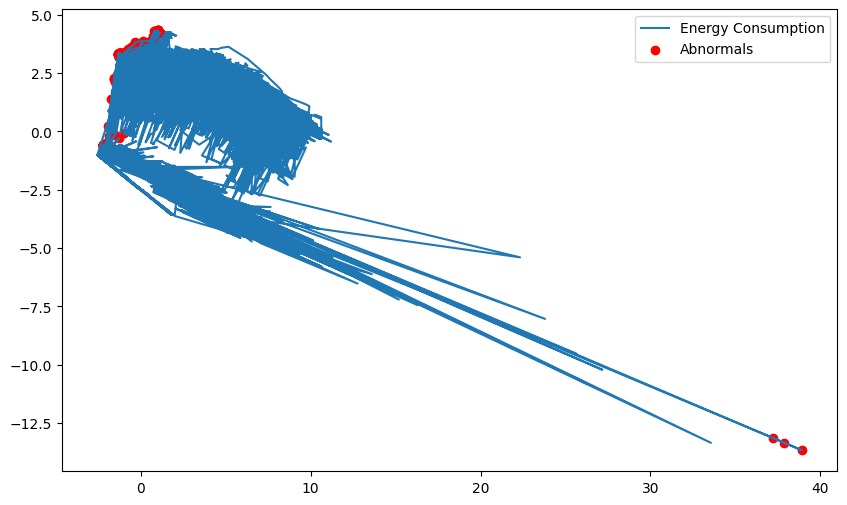

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_pca[:,0], df_pca[:,1], label='Energy Consumption')
plt.scatter(df_pca[:,0][df['Abnormal_gmm'] == 1], df_pca[:,1][df['Abnormal_gmm'] == 1], color='red', label='Abnormals')
plt.legend()
plt.show()

## Saving the Trained Models

In [ ]:
import pickle

with open('drive/MyDrive/Intent-Based Energy Reduction/Abnormal Detection Model/model_gmm.pkl', 'wb') as f:
  pickle.dump(model_gmm, f)

  with open('drive/MyDrive/Intent-Based Energy Reduction/Abnormal Detection Model/gmm_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)